#### **CASE STUDY**

- **Customer Analysis for Retail**

- **BUSINESS PROBLEM:**
- A Retail store is required to analyze the day-to-day transactions and keep a track of its customers
  spread across various locations along with their purchases/returns across various categories.
- Create a report and display the below calculated metrics, reports and inferences.

In [1]:
#importing essential libraries
# for dataframe
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for mathematics operation
import math
import scipy.stats as stats




# style use for plot
plt.style.use('ggplot')

# for suppress warnings
import warnings
warnings.filterwarnings('ignore')

1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
df1=pd.read_csv('Customer.csv')
df2=pd.read_csv('prod_cat_info.csv')
df3=pd.read_csv('Transactions.csv')

In [3]:
print('customers',df1.shape)
print('prod_cat_info',df2.shape)
print('transaction',df3.shape)

customers (5647, 4)
prod_cat_info (23, 4)
transaction (23053, 10)


In [4]:
df2.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
#renaming the column name for the join
df3.rename(columns = {'cust_id':'customer_Id'},inplace =True)

In [6]:
df3.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [7]:
# merging the dataset
df4 =pd.merge(df3,df1,on = 'customer_Id',how = 'right')

In [8]:
final_data =pd.merge(df4,df2,how='right',on='prod_cat_code')

In [9]:
final_data.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,6.331455e+10,268408,26-04-2012,1.0,1.0,1.0,806.0,84.63,890.63,Flagship store,02-01-1970,M,4.0,Clothing,4,Mens
1,6.033834e+10,268159,3/10/2013,3.0,1.0,1.0,318.0,33.39,351.39,e-Shop,08-01-1970,F,8.0,Clothing,4,Mens
2,8.489758e+10,268159,24-12-2012,3.0,1.0,5.0,1410.0,740.25,7790.25,e-Shop,08-01-1970,F,8.0,Clothing,4,Mens
3,7.172006e+10,270181,4/7/2013,3.0,1.0,4.0,1210.0,508.20,5348.20,Flagship store,10-01-1970,F,2.0,Clothing,4,Mens
4,6.653670e+10,273216,3/11/2012,3.0,1.0,4.0,825.0,346.50,3646.50,MBR,15-01-1970,F,5.0,Clothing,4,Mens


2. Prepare a summary report for the merged data set.
- a. Get the column names and their corresponding data types
- b. Top/Bottom 10 observations

In [10]:
#showing the column names
final_data.dtypes

transaction_id       float64
customer_Id            int64
tran_date             object
prod_subcat_code     float64
prod_cat_code        float64
Qty                  float64
Rate                 float64
Tax                  float64
total_amt            float64
Store_type            object
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [11]:
#top 10 observations
final_data.head(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,6.331455e+10,268408,26-04-2012,1.0,1.0,1.0,806.0,84.630,890.630,Flagship store,02-01-1970,M,4.0,Clothing,4,Mens
1,6.033834e+10,268159,3/10/2013,3.0,1.0,1.0,318.0,33.390,351.390,e-Shop,08-01-1970,F,8.0,Clothing,4,Mens
2,8.489758e+10,268159,24-12-2012,3.0,1.0,5.0,1410.0,740.250,7790.250,e-Shop,08-01-1970,F,8.0,Clothing,4,Mens
3,7.172006e+10,270181,4/7/2013,3.0,1.0,4.0,1210.0,508.200,5348.200,Flagship store,10-01-1970,F,2.0,Clothing,4,Mens
4,6.653670e+10,273216,3/11/2012,3.0,1.0,4.0,825.0,346.500,3646.500,MBR,15-01-1970,F,5.0,Clothing,4,Mens
5,7.775624e+10,275152,10/9/2013,4.0,1.0,5.0,308.0,161.700,1701.700,e-Shop,16-01-1970,M,4.0,Clothing,4,Mens
6,2.588572e+10,275034,28-05-2013,3.0,1.0,-2.0,-905.0,190.050,-2000.050,Flagship store,18-01-1970,F,4.0,Clothing,4,Mens
7,2.588572e+10,275034,25-05-2013,3.0,1.0,2.0,905.0,190.050,2000.050,Flagship store,18-01-1970,F,4.0,Clothing,4,Mens
8,2.551195e+10,273541,31-12-2013,3.0,1.0,-3.0,-253.0,79.695,-838.695,MBR,01-02-1970,M,4.0,Clothing,4,Mens
9,2.551195e+10,273541,23-12-2013,3.0,1.0,3.0,253.0,79.695,838.695,MBR,01-02-1970,M,4.0,Clothing,4,Mens


In [12]:
#showing last 10 rows
final_data.tail(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
99283,6.327098e+10,269277,29-06-2012,12.0,6.0,4.0,1278.0,536.760,5648.760,e-Shop,09-12-1992,F,2.0,Home and kitchen,12,Tools
99284,8.476720e+10,268929,14-09-2013,2.0,6.0,3.0,1366.0,430.290,4528.290,MBR,12-12-1992,F,6.0,Home and kitchen,12,Tools
99285,4.577343e+10,269621,23-12-2011,10.0,6.0,2.0,1382.0,290.220,3054.220,TeleShop,16-12-1992,F,10.0,Home and kitchen,12,Tools
99286,6.189740e+10,271772,7/10/2011,2.0,6.0,1.0,197.0,20.685,217.685,e-Shop,17-12-1992,M,2.0,Home and kitchen,12,Tools
99287,8.943275e+10,274474,31-08-2011,2.0,6.0,2.0,1334.0,280.140,2948.140,e-Shop,19-12-1992,M,2.0,Home and kitchen,12,Tools
99288,5.009803e+10,267666,7/1/2014,12.0,6.0,5.0,591.0,310.275,3265.275,e-Shop,24-12-1992,M,6.0,Home and kitchen,12,Tools
99289,7.237379e+10,267666,22-10-2013,11.0,6.0,2.0,612.0,128.520,1352.520,e-Shop,24-12-1992,M,6.0,Home and kitchen,12,Tools
99290,9.720348e+10,267666,23-10-2011,2.0,6.0,3.0,507.0,159.705,1680.705,MBR,24-12-1992,M,6.0,Home and kitchen,12,Tools
99291,7.803441e+10,270476,13-08-2013,11.0,6.0,1.0,971.0,101.955,1072.955,TeleShop,25-12-1992,F,3.0,Home and kitchen,12,Tools
99292,7.136903e+10,269626,18-10-2011,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,27-12-1992,F,5.0,Home and kitchen,12,Tools


c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [13]:
#five point summary
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,99293.0,5.007320e+10,2.899361e+10,3268991.000,2.492150e+10,5.011083e+10,7.528121e+10,9.998755e+10
customer_Id,99293.0,2.710300e+05,2.429334e+03,266783.000,2.689560e+05,2.709820e+05,2.731200e+05,2.752650e+05
prod_subcat_code,99293.0,6.796894e+00,3.609439e+00,1.000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,99293.0,4.003243e+00,1.563991e+00,1.000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
Qty,99293.0,2.438017e+00,2.260726e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,99293.0,6.379199e+02,6.215763e+02,-1499.000,3.130000e+02,7.130000e+02,1.109000e+03,1.500000e+03
Tax,99293.0,2.488737e+02,1.870144e+02,7.350,9.828000e+01,1.999200e+02,3.669750e+02,7.875000e+02
total_amt,99293.0,2.114616e+03,2.502307e+03,-8270.925,7.624500e+02,1.761370e+03,3.585725e+03,8.287500e+03
city_code,99257.0,5.467221e+00,2.859343e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
prod_sub_cat_code,99293.0,6.806985e+00,3.615952e+00,1.000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01


## Inferences :-

* there are some missing values in city_code
* 50% is our median
* q1 is your 25%
* q3 is your 75%


d. Frequency tables for all the categorical variables

In [14]:
final_data.describe(include=object).T

,count,unique,top,freq
tran_date,99293,1129,25-08-2012,153
Store_type,99293,4,e-Shop,40185
DOB,99293,3987,27-12-1988,156
Gender,99253,2,M,51051
prod_cat,99293,6,Books,36414
prod_subcat,99293,18,Mens,7957


3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [15]:
#changing a datatype of dataset from object to datetime
final_data['tran_date'] = pd.to_datetime(final_data['tran_date'])

In [16]:
#changing a datatype of dataset from object to datetime
final_data['DOB'] = pd.to_datetime(final_data['DOB'])

In [17]:
continous = final_data.select_dtypes(float).columns

In [18]:
continous

Index(['transaction_id', 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate',
       'Tax', 'total_amt', 'city_code'],
      dtype='object')

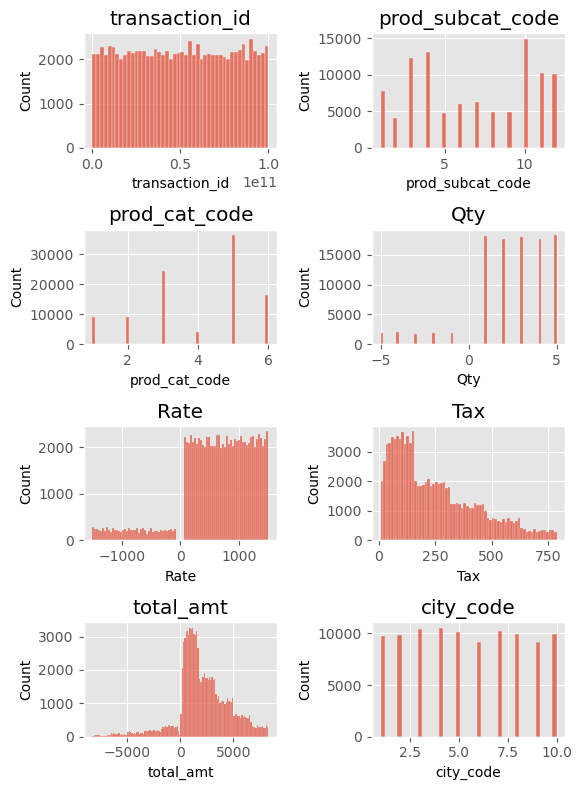

In [19]:
plt.figure(figsize=(6,8))
t = 1
for i in continous:
    plt.subplot(4,2,t)
    sns.histplot(data = final_data,x = final_data[i])
    t+=1
    plt.title(i)
    
    

plt.tight_layout()
plt.show()

- Tax charged is rightly skewed.
- Total amount spent is normally distributed but little bit left skewed.
- City code is normally distributed

In [20]:
categorical_variables=final_data.select_dtypes(include=object).columns
categorical_variables

Index(['Store_type', 'Gender', 'prod_cat', 'prod_subcat'], dtype='object')

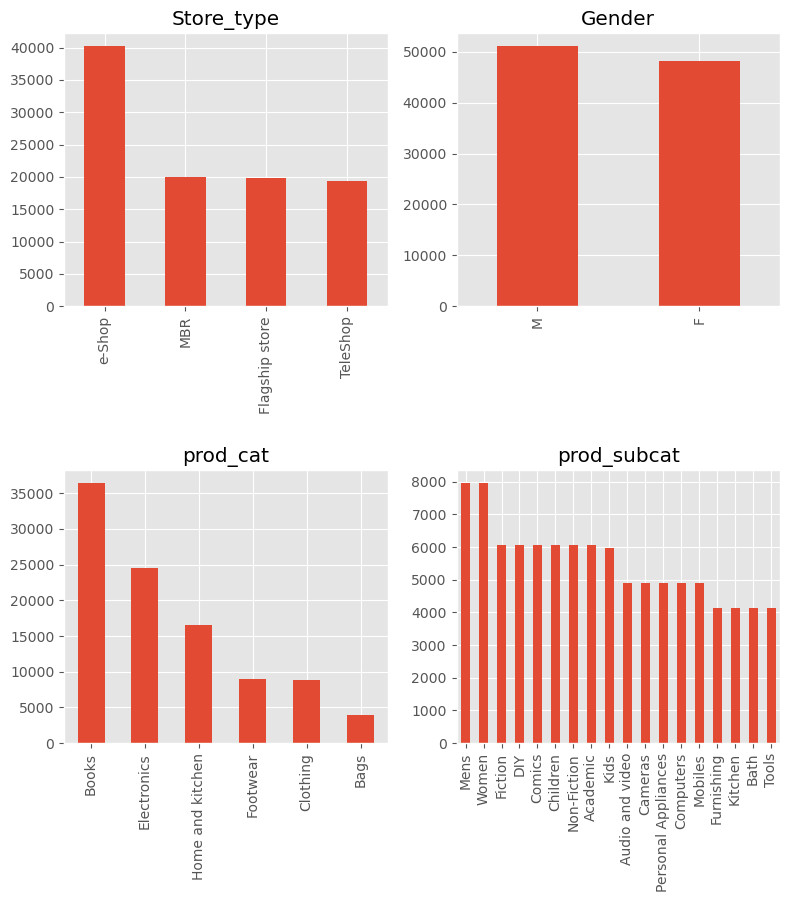

In [21]:
plt.figure(figsize=(8,12))
t=1
for i in categorical_variables:
    plt.subplot(3,2,t)
    final_data[i].value_counts().plot(kind = 'bar')
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

- the product category sold the max is Books followed by Electronics items then home & kitchen things.
- 
- People prefer e-shooping most and teleshoping the least
- Males do more shopping as compare to females

### 4. Calculate the following information using the merged dataset :-
- a. Time period of the available transaction data
- b. Count of transactions where the total amount of transaction was negative

In [22]:
final_data['tran_day'] = final_data['tran_date'].dt.day
final_data['tran_month'] =final_data['tran_date'].dt.month
final_data['tran_year'] =final_data['tran_date'].dt.year

In [23]:
#Count of transactions where the total amount of transaction was negative

final_data[final_data['total_amt']<0]['total_amt'].count()

9294

In [24]:
final_data.sample()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,tran_day,tran_month,tran_year
45159,87125650.0,268666,2011-05-08,1.0,4.0,5.0,359.0,188.475,1983.475,e-Shop,1978-11-12,M,3.0,Bags,4,Women,8,5,2011


<Axes: xlabel='prod_subcat_code'>

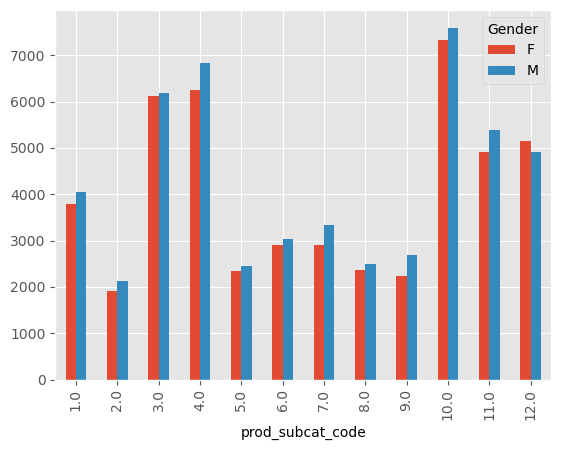

In [25]:
#5. Analyze which product categories are more popular among females vs male customers.
pd.crosstab(final_data['prod_subcat_code'],final_data['Gender']).plot(kind = 'bar')

6. Which City code has the maximum customers and what was the percentage of customers from
that city?

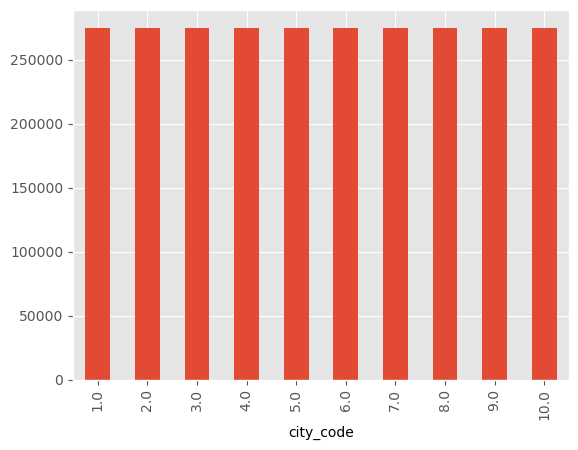

In [26]:
final_data.groupby(by = 'city_code')['customer_Id'].max().plot(kind = 'bar')
plt.show()

In [27]:
final_data['city_code'].unique()

array([ 4.,  8.,  2.,  5.,  6., 10.,  3.,  1.,  7.,  9., nan])

7. Which store type sells the maximum products by value and by quantity?

In [28]:
final_data.sample()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,tran_day,tran_month,tran_year
96025,2.247809e+10,268712,2013-02-16,12.0,6.0,1.0,1432.0,150.36,1582.36,TeleShop,1975-03-03,F,6.0,Home and kitchen,12,Tools,16,2,2013


In [29]:
final_data.groupby(by = ['Store_type'])['total_amt','Qty'].max()

,total_amt,Qty
Store_type,,
Flagship store,8254.35,5.0
MBR,8287.50,5.0
TeleShop,8287.50,5.0
e-Shop,8287.50,5.0


8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?

In [30]:
final_data.sample()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,tran_day,tran_month,tran_year
11150,6.792088e+10,267517,2013-01-25,1.0,2.0,3.0,1214.0,382.41,4024.41,MBR,1987-09-14,F,9.0,Footwear,1,Mens,25,1,2013


In [31]:
final_data[(final_data['Store_type']=='Flagship store')|(final_data['prod_cat'] == 'Electronics')&(final_data['prod_cat'] == 'Clothing')]

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,tran_day,tran_month,tran_year
0,6.331455e+10,268408,2012-04-26,1.0,1.0,1.0,806.0,84.630,890.630,Flagship store,1970-02-01,M,4.0,Clothing,4,Mens,26,4,2012
3,7.172006e+10,270181,2013-04-07,3.0,1.0,4.0,1210.0,508.200,5348.200,Flagship store,1970-10-01,F,2.0,Clothing,4,Mens,7,4,2013
6,2.588572e+10,275034,2013-05-28,3.0,1.0,-2.0,-905.0,190.050,-2000.050,Flagship store,1970-01-18,F,4.0,Clothing,4,Mens,28,5,2013
7,2.588572e+10,275034,2013-05-25,3.0,1.0,2.0,905.0,190.050,2000.050,Flagship store,1970-01-18,F,4.0,Clothing,4,Mens,25,5,2013
41,1.683967e+10,270430,2013-01-29,4.0,1.0,2.0,1282.0,269.220,2833.220,Flagship store,1970-01-06,M,7.0,Clothing,4,Mens,29,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99259,3.409162e+10,269734,2011-06-24,10.0,6.0,1.0,1479.0,155.295,1634.295,Flagship store,1992-07-11,F,1.0,Home and kitchen,12,Tools,24,6,2011
99261,2.349128e+10,274875,2012-08-28,11.0,6.0,3.0,425.0,133.875,1408.875,Flagship store,1992-09-11,F,3.0,Home and kitchen,12,Tools,28,8,2012
99272,3.656532e+10,272042,2011-07-18,10.0,6.0,4.0,726.0,304.920,3208.920,Flagship store,1992-01-12,M,2.0,Home and kitchen,12,Tools,18,7,2011
99273,5.024232e+10,272141,2012-07-03,10.0,6.0,3.0,754.0,237.510,2499.510,Flagship store,1992-02-12,F,10.0,Home and kitchen,12,Tools,3,7,2012


In [48]:
final_data['Gender']

0        M
1        F
2        F
3        F
4        F
        ..
99288    M
99289    M
99290    M
99291    F
99292    F
Name: Gender, Length: 99293, dtype: object

In [53]:
#9. What was the total amount earned from "Male" customers under the "Electronics" category?
print('total amount earned  by male customers under electronics',final_data[(final_data['prod_cat']=='Electronics') & (final_data['Gender']=='M')]['total_amt'].sum())

total amount earned  by male customers under electronics 28515547.125000004


#10. How many customers have more than 10 unique transactions, after removing all transactions
     which have any negative amounts?

In [100]:
a=final_data[final_data['total_amt']>0]
a.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,tran_day,tran_month,tran_year
0,6.331455e+10,268408,2012-04-26,1.0,1.0,1.0,806.0,84.63,890.63,Flagship store,1970-02-01,M,4.0,Clothing,4,Mens,26,4,2012
1,6.033834e+10,268159,2013-03-10,3.0,1.0,1.0,318.0,33.39,351.39,e-Shop,1970-08-01,F,8.0,Clothing,4,Mens,10,3,2013
2,8.489758e+10,268159,2012-12-24,3.0,1.0,5.0,1410.0,740.25,7790.25,e-Shop,1970-08-01,F,8.0,Clothing,4,Mens,24,12,2012
3,7.172006e+10,270181,2013-04-07,3.0,1.0,4.0,1210.0,508.20,5348.20,Flagship store,1970-10-01,F,2.0,Clothing,4,Mens,7,4,2013
4,6.653670e+10,273216,2012-03-11,3.0,1.0,4.0,825.0,346.50,3646.50,MBR,1970-01-15,F,5.0,Clothing,4,Mens,11,3,2012


In [109]:
b = a.groupby(by ='customer_Id')['total_amt'].nunique().reset_index()

In [120]:
b[b['total_amt']>10]
# these are the 6 customers AND their customer IDS  who have more than 10 unique transactions
# after removing all transactions which have any negative amounts?

,customer_Id,total_amt
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


#11. For all customers aged between 25 - 35, find out:
- a. What was the total amount spent for “Electronics” and “Books” product categories?
- b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [57]:
final_data[(final_data['prod_cat'] =='Electronics')|(final_data['prod_cat'] =='Books')]['total_amt'].sum()

130548482.415

In [71]:
print('the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014',final_data[(final_data['tran_date'] > '2014-01-1') & (final_data['tran_date'] < '2014-03-1')]['total_amt'].sum())

the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 5591225.965
